# Batch processing
The batch processing routines allow for convenient processing and comparison of multiple datasets simultaneously. These rely on a proper configuration of cellpy, including a properly working config file and a database file. A basic introduction on how to setup and use the batch processing routines is given here.

## Setting up things properly

### Make sure you have a properly working config file
For `cellpy` to find stuff, it needs to know where to look. A config file exists for this purpose. This is typically called `.cellpy_prms_username.conf`, and located in your home or user directory.

For more details on the config file, have a look at [Setup and configuration](/docs/getting_started/configuration.md).


### The database file
This notebook uses the `cellpy` `batch` utility. For it to work properly (or at all) you will have to provide it with a database. Currently, `cellpy` ships with a very simple database solution that hardly justifies its name as a database. It reads an excel-file where the first row acts as column headers, the second provides the type (*e.g.* string, bool, etc), and the rest provides the necessary information for each of the cells (one row pr. cell). You can of course choose to implement a database and a loader your self.

A sample excel file ("db-file") is provided within the [examples folder on GitHub](https://github.com/jepegit/cellpy/tree/master/examples/cellpy%20batch%20utility). You will need fill inn values manually, one row for each cell you want to load. Then you will have to put it in the database folder (as defined in your config file where it says `db_file:` in the `Paths`-section). The name of the file must also be the same as defined in the config-file (`db_filename:`, *i.e* `cellpy_db.xlsx` in the example config file snippet above).

When `cellpy` reads the file, it uses the batch column (see below) to select which rows (*i.e.* cells) to load. For example, if the "b01" batch column is the one you tell `cellpy` to use and you provide it with the name "casandras_experiment", it will only select the rows that has "casandras_experiment" in the "b01" column. You provide `cellpy` with the "lookup" name when you issue the `batch.init` command, for example:

```python
b = batch.init("paper01", "cool_project", batch_col="b01")
```

You must always have the columns colored green filled out. And make sure that the `id` column (the first one in the example xlsx file) has a unique integer for each row (it is used as a "key" when looking up stuff from the file).

### Filenames
Make sure that the names of your experiment-files (for example your .res files) are of the form `date_something_that_describes_the_cell.res` (this is the name-format supported at the moment).

## Loading batch data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from rich import print

import cellpy
from cellpy import prms
from cellpy import prmreader
from cellpy.utils import batch, collectors

Check and (if necessary) override some of the configuration parameters:

In [3]:
prms.Paths.db_path = "."
prms.Paths.db_filename = "cellpy_db.xlsx"
prms.Paths.rawdatadir = "data/raw"
prms.Paths.cellpydatadir = "data/cellpyfiles"
prms.Paths.filelogdir = "out"
prms.Paths.notebookdir = "out"
prms.Paths.batchfiledir = "out"
prms.Paths.outdatadir = "out"

### Initialising the cellpy batch object
To create *Journal Pages*, appropriate names for the project and the experiment have to be set:

In [4]:
project = "cool_project"
name = "paper01"
batch_col = "b01"

In [5]:
print(" INITIALISATION OF BATCH ".center(80, "="))
b = batch.init(name, project, batch_col=batch_col)

=========================== INITIALISATION OF BATCH ============================

Setting some parameters on automatic export of selected files:

In [7]:
b.experiment.export_raw = False
b.experiment.export_cycles = False
b.experiment.export_ica = False

Load info from your database and write the corresponding journal pages:

In [6]:
b.create_journal()

Create the appropriate folders where cellpy will place the output files:

In [7]:
b.paginate()

Have a look at the resulting dataframe:

In [8]:
b.pages

,argument,mass,total_mass,loading,nom_cap,area,experiment,fixed,label,cell_type,instrument,raw_file_names,cellpy_file_name,comment,group,sub_group
filename,,,,,,,,,,,,,,,,
20180418_sf033_2_cc,None,0.337149,0.56,0.190787,3118.817466,1.767146,cycling,0,sf033_2,anode,arbin_res,[C:\Users\juliaw\cellpy_develop\cellpy\docs\ex...,data/cellpyfiles/20180418_sf033_2_cc.h5,SF12 Filter D micro-slurry,1,1
20180418_sf033_3_cc,None,0.343169,0.57,0.194194,3118.817466,1.767146,cycling,0,sf033_3,anode,arbin_res,[C:\Users\juliaw\cellpy_develop\cellpy\docs\ex...,data/cellpyfiles/20180418_sf033_3_cc.h5,SF12 Filter D micro-slurry,1,2
20180418_sf033_4_cc,None,0.288984,0.48,0.163532,3118.817466,1.767146,cycling,0,sf033_4,anode,arbin_res,[C:\Users\juliaw\cellpy_develop\cellpy\docs\ex...,data/cellpyfiles/20180418_sf033_4_cc.h5,SF12 Filter D micro-slurry,1,3
20180418_sf033_5_cc,None,0.295005,0.49,0.166939,3118.817466,1.767146,cycling,0,sf033_5,anode,arbin_res,[C:\Users\juliaw\cellpy_develop\cellpy\docs\ex...,data/cellpyfiles/20180418_sf033_5_cc.h5,SF12 Filter D micro-slurry,1,4
20180420_sf036_2_cc,None,0.572383,0.95,0.323902,3122.348698,1.767146,cycling,0,sf036_2,anode,arbin_res,[C:\Users\juliaw\cellpy_develop\cellpy\docs\ex...,data/cellpyfiles/20180420_sf036_2_cc.h5,SF12 Filter 1 micro-slurry,2,1
20180420_sf036_3_cc,None,0.716985,1.19,0.405730,3122.348698,1.767146,cycling,0,sf036_3,anode,arbin_res,[C:\Users\juliaw\cellpy_develop\cellpy\docs\ex...,data/cellpyfiles/20180420_sf036_3_cc.h5,SF12 Filter 1 micro-slurry,2,2
20180420_sf036_4_cc,None,0.584433,0.97,0.330721,3122.348698,1.767146,cycling,0,sf036_4,anode,arbin_res,[C:\Users\juliaw\cellpy_develop\cellpy\docs\ex...,data/cellpyfiles/20180420_sf036_4_cc.h5,SF12 Filter 1 micro-slurry,2,3


**Note:** You can of course also create this dataframe yourself without loading from the .xlsx database file.

### Loading data into the initialised batch object

Now that everything is set up `b.update()` loads the data (and exports the corresponding .csv-files if export_(raw/cycles/ica) = True). Depending on the size of your datafiles, this might take some time:

In [9]:
b.update()

  0%|          | 0/7 [00:00<?, ?it/s]

## Exploring batch data

The `report()` method creates a report/summary on all the cells in your cellpy batch object:

In [13]:
b.report()

,mass,total_mass,loading,nom_cap,empty,raw_rows,steps_rows,summary_rows,last_cycle,average_capacity,max_capacity,min_capacity,std_capacity
filename,,,,,,,,,,,,,
20180418_sf033_2_cc,0.337149,0.560000,0.190787,3118.817466,False,160059,1578,304,304,1567.198001,2079.481739,0.000000,209.150717
20180418_sf033_3_cc,0.343169,0.570000,0.194194,3118.817466,False,160980,1587,304,304,1597.665927,2103.339517,0.000000,205.046181
20180418_sf033_4_cc,0.288984,0.480000,0.163532,3118.817466,False,155754,1567,304,304,1493.788287,1952.530597,0.000000,189.297846
20180418_sf033_5_cc,0.295005,0.490000,0.166939,3118.817466,False,169567,1588,304,304,1741.579324,2302.442797,0.000000,227.149486
20180420_sf036_2_cc,0.572383,0.950000,0.323902,3122.348698,False,157750,1586,304,304,1479.043916,2319.709751,0.000000,474.421220
20180420_sf036_3_cc,0.716985,1.190000,0.405730,3122.348698,False,134496,1571,304,304,1062.506245,2323.285459,0.000000,622.550951
20180420_sf036_4_cc,0.584433,0.970000,0.330721,3122.348698,False,128547,1561,304,304,880.014288,2608.773865,0.000000,889.235451


To get a visual overview over all cells in your cellpy batch object, we can use the convenient `b.plot()` function. This plots the charge capacity, coulombic efficiency and resistance vs. cycle number. Setting `rate=True` adds a plot of C-rates.

In [10]:
b.plot(rate=True)

## Working with batch objects
The implemented *Collectors* are meant to simplify plotting and exporting when working with batch objects. Available collectors include the `BatchSummaryCollector`, the `BatchCycleCollector` and the `BatchICACollector`.

### Summaries
The `BatchSummaryCollector` class collects and shows sumaries, including, e.g., the option to show statistical variations in the data (`spread=True`):

In [11]:
group_labels = {1: "starts ok", 2: "starts best"}
discharge_cap_summaries_full = collectors.BatchSummaryCollector(
    b,
    columns=["discharge_capacity_gravimetric"],
    max_cycle=100,
    group_it=True,
    data_collector_arguments=dict(custom_group_labels=group_labels),
    spread=True,
    height=600,
)
discharge_cap_summaries_full.show()

figure name: paper01_collected_summaries_discharge_capacity_gravimetric_average


These summaries can be saved for later:

In [12]:
# discharge_cap_summaries_full.save(serial_number=1)

Summary data can also be accessed from `b.summaries`:

In [13]:
discharge_capacity = b.summaries.discharge_capacity_gravimetric
charge_capacity = b.summaries.charge_capacity_gravimetric
coulombic_efficiency = b.summaries.coulombic_efficiency
ir_charge = b.summaries.ir_charge

and ploted using matplotlib:

Text(0, 0.5, 'resistance')

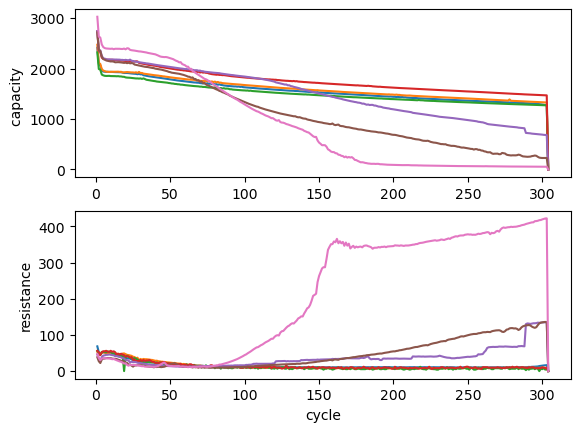

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(discharge_capacity)
ax1.set_ylabel("capacity ")
ax2.plot(ir_charge)
ax2.set_xlabel("cycle")
ax2.set_ylabel("resistance")

### Cycles
The `BatchCyclesCollector` class creates a collection of capacity plots, including several different options for customization. Two examples are shown here:

In [15]:
cells_collected = collectors.BatchCyclesCollector(b, max_cycle=10)
cells_collected.show()

figure name: paper01_collected_cycles_intp_p100_bf_pr_cell


In [16]:
cycles_collected = collectors.BatchCyclesCollector(
    b,
    cycles=[1, 2, 3, 10, 100, 200],
    collector_type="forth-and-forth",
    plot_type="fig_pr_cycle",
)
cycles_collected.show()

figure name: paper01_collected_cycles_intp_p100_ff_pr_cyc


### Incremental capacity analysis (ICA)
Similarly, the `BatchICACollector` creates a collection of ICA (dQ/dV) plots:

In [18]:
icas_collected = collectors.BatchICACollector(b,cycles=[2,3,4])
icas_collected.show()

figure name: paper01_collected_ica_pr_cell


## Looking at individual cells in a batch
The batch object is in principle a collection of several CellpyCell objects. Those can of course be selected and looked at individually.

To check which cells are contained within your batch, you can simply print the cell names:

In [19]:
cell_labels = b.experiment.cell_names
print(cell_labels)

[
    '20180418_sf033_2_cc',
    '20180418_sf033_3_cc',
    '20180418_sf033_4_cc',
    '20180418_sf033_5_cc',
    '20180420_sf036_2_cc',
    '20180420_sf036_3_cc',
    '20180420_sf036_4_cc'
]

Select one cell to look at:

In [20]:
label = cell_labels[0]
c = b.experiment.data[label]

Now that you have selected one cell, you can use all the standard cellpy routines available for CellpyCells, e.g. view the available info on this cell:

In [27]:
#c

And use the `get_cap` method to extract and plot voltage curves:

In [23]:
cap = c.get_cap(categorical_column=True, method="forth-and-forth")
cap.head(2)

,voltage,capacity,direction
267,2.721604,0.000054,-1
268,2.708690,0.002016,-1


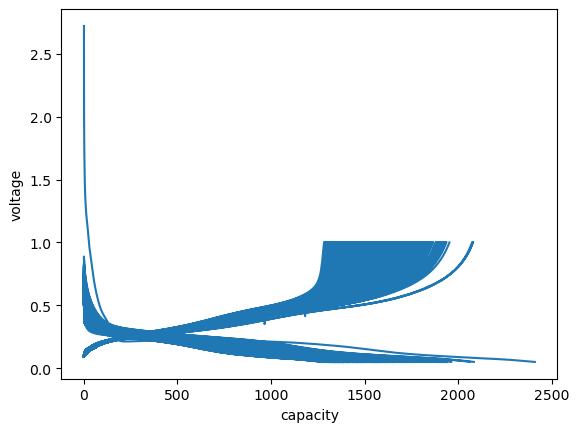

In [25]:
fig, ax = plt.subplots()
ax.plot(cap.capacity, cap.voltage)
ax.set_xlabel("capacity")
ax.set_ylabel("voltage");

Cleaning up the plot a bit...

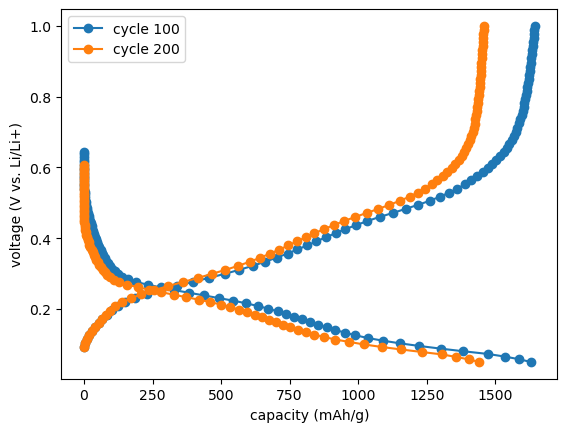

In [26]:
voltage_capacity_100 = c.get_cap(cycle=100, method="forth-and-forth", interpolated=True, number_of_points=80)
voltage_capacity_200 = c.get_cap(cycle=200, method="forth-and-forth", interpolated=True, number_of_points=80)

fig, ax = plt.subplots()
ax.set_xlabel(f"capacity ({c.cellpy_units.charge}/{c.cellpy_units.specific_gravimetric})")
ax.set_ylabel(f"voltage ({c.cellpy_units.voltage} vs. Li/Li+)")
ax.plot(voltage_capacity_100.capacity, voltage_capacity_100.voltage, "o-", label="cycle 100")
ax.plot(voltage_capacity_200.capacity, voltage_capacity_200.voltage, "o-", label="cycle 200")
ax.legend();